### SVM for 3 classes: Angry, Fear, Happy

In [2]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

pick_in = open('finaldata.pickle', 'rb')
df = pickle.load(pick_in)
pick_in.close()

In [3]:
X = []
y = []


for feature, label in df:
  if label in (0,2,3):
    X.append(feature)
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)

print("Data Types:", type(X), type(y))
print("Lengths:", len(X), len(y))
print("Shapes:", X.shape, y.shape)

Data Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Lengths: 17165 17165
Shapes: (17165, 2304) (17165,)


In [4]:
# Changing class numbers
y = np.where(y == 2, 1, y)
y = np.where(y == 3, 2, y)

In [13]:
# Selecting limited data or we can say down sampling all classes

import random
mylist = []

for i in range(0,2000):
    x = random.randint(0,17164)
    mylist.append(x)

In [14]:
X_new = []
y_new = []

for i in mylist:
  X_new.append(X[i])
  y_new.append(y[i])
  
X_new = np.asarray(X_new)
y_new = np.asarray(y_new)

print("Data Types:", type(X_new), type(y_new))
print("Lengths:", len(X_new), len(y_new))
print("Shapes:", X_new.shape, y_new.shape)

Data Types: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Lengths: 2000 2000
Shapes: (2000, 2304) (2000,)


In [15]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X_new, y_new, test_size=0.25,
                                                  shuffle=True)

In [16]:
print("Random Training shape:", X_train.shape, y_train.shape)
print("Random Testing shape:", X_test.shape, y_test.shape)

print("Random Training Type:", type(X_train), type(y_train))
print("Random Testing Type:", type(X_test), type(y_test))

Random Training shape: (1500, 2304) (1500,)
Random Testing shape: (500, 2304) (500,)
Random Training Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Random Testing Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>


*Lets visualize some of the faces and their labels.*

Labels are as follows:

Angry = 0<br>
Fear = 1<br>
Happy = 2<br>

Text(0.5, 1.0, 'Label: 1')

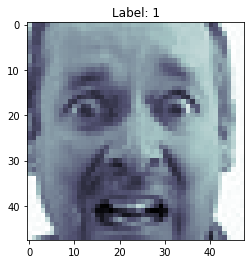

In [17]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[0]))

Text(0.5, 1.0, 'Label: 0')

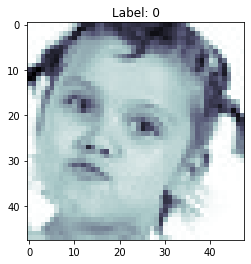

In [18]:
from matplotlib import pyplot as plt
plt.imshow(X_train[10].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_train[10]))

Text(0.5, 1.0, 'Label: 1')

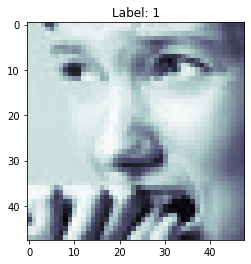

In [19]:
from matplotlib import pyplot as plt
plt.imshow(X_test[120].reshape(48,48),cmap=plt.cm.bone)
plt.title('Label: {}'.format(y_test[120]))

Labels for first 15 training samples: [1 1 0 2 0 2 1 1 2 1 0 2 2 1 0]


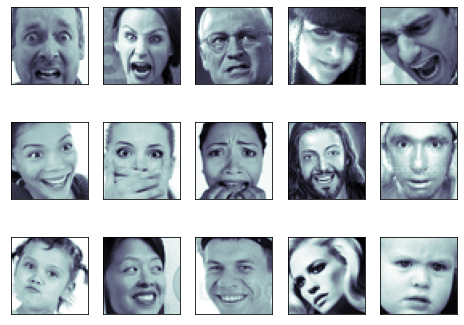

In [20]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(48,48), cmap=plt.cm.bone)
    
print("Labels for first 15 training samples:", y_train[0:15])

### Understanding PCA

In [21]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(1500, 2304)


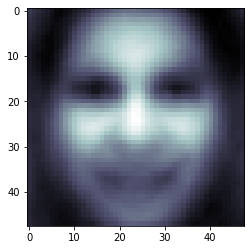

In [22]:
# Average face
print(pca.components_.shape)
plt.imshow(pca.mean_.reshape(X_train[0].reshape(48,48).shape),
           cmap=plt.cm.bone)

In [23]:
k = X_train[0]
k = k.reshape(48,48)
k.shape

(48, 48)

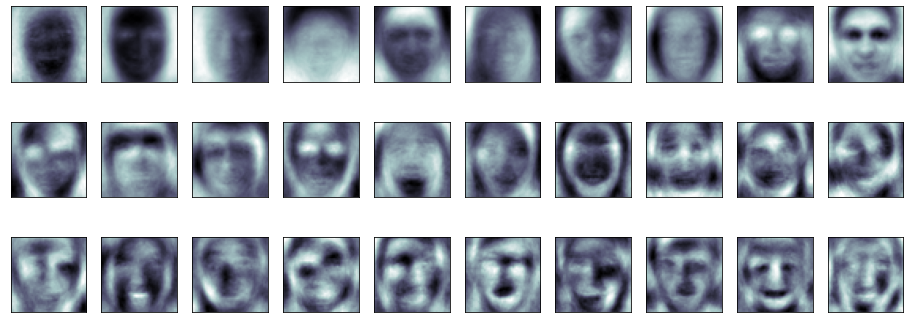

In [24]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(k.shape),
              cmap=plt.cm.bone)

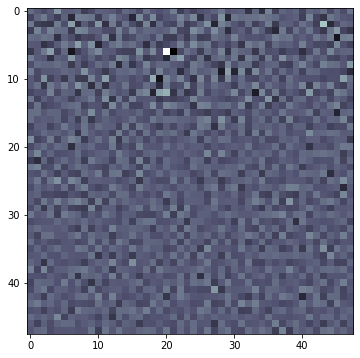

In [25]:
# Last Principal Component

fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot()
ax.imshow(pca.components_[1499].reshape(k.shape),
              cmap=plt.cm.bone)

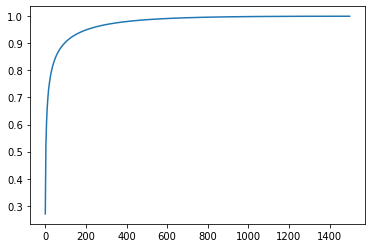

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [27]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=600).fit(X_train)

projected = pca1.fit_transform(X_train) 
print(projected.shape)

(1500, 600)


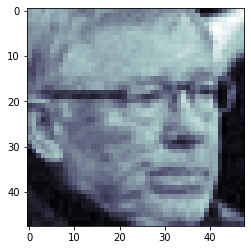

In [28]:
# Inversing PCA to check whether we could retrieve the image
inv_proj3 = pca1.inverse_transform(projected)
inv_proj3.shape
plt.imshow(inv_proj3[22].reshape(48,48),cmap=plt.cm.bone)

### Building model using PCA and SVM

In [29]:
pca = PCA(n_components=600).fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(1500, 600)

In [30]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(500, 600)

### Optimizing parameters for SVM

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
    {'C': [0.5, 1, 10, 100, 1000],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_pca, y_train)

print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [32]:
clf = SVC(C=10, gamma='scale', kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy score: ",clf.score(X_test, y_test))

Accuracy score:  0.602


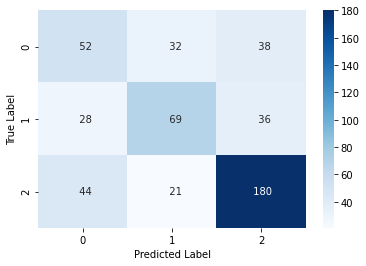

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
hm = sns.heatmap(cf_matrix, annot=True, fmt='4', cmap='Blues')

plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show()

In [34]:
# Saving model
import joblib
joblib.dump(clf, "svm_model.joblib")

['svm_model.joblib']

In [ ]:
# load the model from disk for more analysis
loaded_svc = joblib.load("svm_model.joblib")